First 5 Rows:

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Shape: (200, 5)

Columns:
 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Training Data: (160, 3)
Testing 

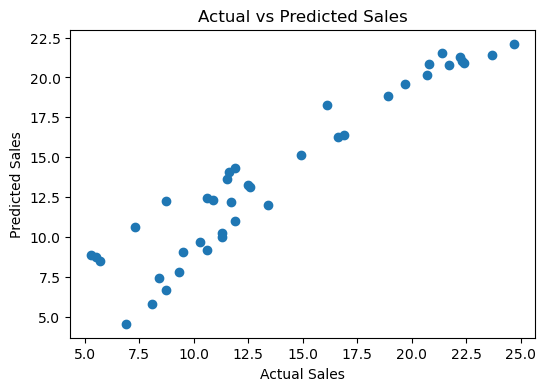

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 2. Load Dataset
df = pd.read_csv("Advertising.csv")
print("First 5 Rows:\n")
print(df.head())
# 3. Dataset Info
print("\nDataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
print(df.info())
# 4. Data Cleaning
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())
# Drop unnecessary column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
# 5. Features & Target
X = df.drop("Sales", axis=1)   # Advertising spend
y = df["Sales"]                # Sales output
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining Data:", X_train.shape)
print("Testing Data:", X_test.shape)
# 7. Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# 8. Prediction
y_pred = model.predict(X_test)
print("\nPredicted Sales:\n", y_pred[:10])
# 9. Model Evaluation
print("\nModel Performance:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
# 10. Graph — Actual vs Predicted Sales
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
